In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mec import make_circle
from Grid import Grid
import scipy.integrate as integrate
from scipy.optimize import curve_fit
import random
import pandas as pd
import lmfit

In [20]:
df = pd.read_csv("../results/tmp.csv", names=["M", "edges"])

In [3]:
def edges(x, c):
    def g(y):
        # return 1
        a = 2
        return (a/(1-np.exp(-a))) * np.exp(-a*y)

    integrand = lambda y: g(y) * (x**y)
    return c *integrate.quad(integrand, 0, 1)[0] * x**2

def edges_vec(x, c):
    if len(x) > 1:
        return [edges(m, c) for m in x]
    else:
        return edges(x, c)

def rt_vec(x, c, d):
    if len(x) > 1:
        return [(edges(m, c) / m**2) + d for m in x]
    else:
        return (edges(x, c) / x**2) + d

In [35]:
df = pd.read_csv("../results/tmp.csv", names=["M", "edges"])

def func(x, c, g):
    return c*x**g
popt, pcov = curve_fit(func, df['M'], df["edges"])
print(popt, pcov)

[4.04183892 2.99782833] [[ 8.76119748e-03 -4.80577931e-04]
 [-4.80577931e-04  2.63866858e-05]]


In [ ]:
model = lmfit.Model(edges_vec)
params = lmfit.Parameters()
params.add('c', value=1, min=0, max=1e10)
result = model.fit(df['edges'], params, x=df['M'])
c = result.params['c'].value

print(result.fit_report())

Text(0, 0.5, 'Approx total number of edges')

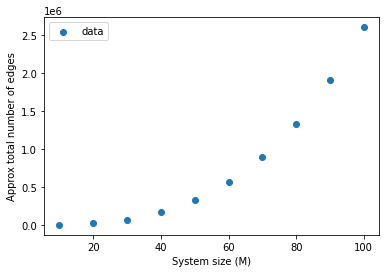

In [34]:
plt.scatter(df["M"], df["edges"], label="data")

# xs = np.linspace(0, 200, 100)
# ys = edges_vec(xs, c)
# plt.plot(xs, ys, label=f"exact fit, c = {c}")

plt.legend()
plt.xlabel("System size (M)")
plt.ylabel("Approx total number of edges")

# plt.savefig(f'../figures/notes8.png', dpi=600, transparent=False, bbox_inches='tight')


[[Model]]
    Model(rt_vec)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 13
    # variables        = 2
    chi-square         = 0.66434364
    reduced chi-square = 0.06039488
    Akaike info crit   = -34.6607662
    Bayesian info crit = -33.5308675
    R-squared          = 0.99860600
[[Variables]]
    c:  1.85128302 +/- 0.02084793 (1.13%) (init = 1)
    d:  6.35342503 +/- 0.18955880 (2.98%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, d) = -0.933


Text(0, 0.5, 'Avg routing time')

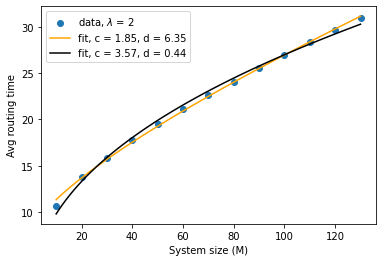

In [8]:
k = 5
beta = 1
a = 2
type = f"a_{a}"
# type = "uniform"
df2 = pd.read_csv(f"../results/k_{k}/res_files_dist/{type}/combined_res.res")

df2 = df2[(df2['beta'] == round(beta, 1)) & (df2['gamma'] == 0)]
# plt.scatter(df2['m'], df2['mean'], label='data')

# xs = np.linspace(10, 200, 1000)
# ys = rt_vec(xs, 2, 6)
# plt.plot(xs, ys, label='exact')


model = lmfit.Model(rt_vec)
params = lmfit.Parameters()
params.add('c', value=1, min=0, max=1e10)
params.add('d', value=0, min=-1e2, max=1e2)


result = model.fit(df2['mean'], params, x=df2['m'])
c = result.params["c"].value
d = result.params["d"].value
print(result.fit_report())

plt.scatter(df2["m"], df2["mean"], label=f"data, $\lambda$ = {a}")

xs = np.linspace(min(df2["m"]), max(df2["m"]), 100)
ys = rt_vec(xs, c, d)
plt.plot(xs, ys, label=f"fit, c = {round(c, 2)}, d = {round(d, 2)}", c='orange')

def f(x, c, d):
    return c*x**d

model = lmfit.Model(f)
params = lmfit.Parameters()
params.add('c', value=1, min=0, max=1e5)
params.add('d', value=0.5, min=0, max=1)

# model = lmfit.Model(rt_vec)
# params = lmfit.Parameters()
# params.add('c', value=1, min=0, max=1e10)
# # params.add('d', value=0, min=-1e2, max=1e2)
# params.add('d', value=0, vary=False)

result = model.fit(df2['mean'], params, x=df2['m'])
c = result.params["c"].value
d = result.params["d"].value
ys = f(xs, c, d)
plt.plot(xs, ys, label=f"fit, c = {round(c, 2)}, d = {round(d, 2)}", c='black')


plt.legend()
plt.xlabel("System size (M)")
plt.ylabel("Avg routing time")

# plt.savefig(f'../figures/notes9b.png', dpi=600, transparent=False, bbox_inches='tight')

